In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  C:\Users\Shimul\Documents\Building CSE 4000 Thesis\Defense 27_03_2022


## Setup Dataset Path 

In [3]:
building_house_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/brick_house'
mosque_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/mosque'
temple_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/temple'
tinshed_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/tinshed'
skyscraper_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/skyscraper'
mud_house_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/mud_house'

In [2]:
brick_house=glob.glob('DATASET/brick_house/*.*')
mosque=glob.glob('DATASET/mosque/*.*')
temple=glob.glob('DATASET/temple/*.*')
tinshed=glob.glob('DATASET/tinshed/*.*')
skyscraper=glob.glob('DATASET/skyscraper/*.*')
mud_house=glob.glob('DATASET/mud_house/*.*')

In [3]:
print('brick_house data : ',len(brick_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('skyscraper data: ',len(skyscraper))
print('Mud house data: ',len(mud_house))

brick_house data :  250
Mosque data:  250
Temple data:  250
Tinshed data:  250
skyscraper data:  250
Mud house data:  250


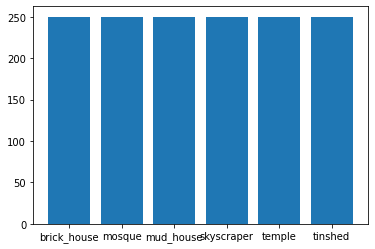

In [60]:
import matplotlib.pyplot as plt
classnames = ['brick_house', 'mosque','mud_house', 'skyscraper', 'temple', 'tinshed']
Numbers = [len(brick_house),len(mosque),len(temple),len(tinshed),len(skyscraper),len(mud_house)]
plt.bar(classnames,Numbers,)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/train'
test_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/test'
print(os.listdir(train_path))
print(os.listdir(test_path))

['brick_house', 'mosque', 'mud_house', 'skyscraper', 'temple', 'tinshed']
['brick_house', 'mosque', 'mud_house', 'skyscraper', 'temple', 'tinshed']


## Dataset Preprocssing using ImageDataGenerator

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
WIDTH=224
HEIGHT=224

In [7]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.1 ,
                                    zoom_range=0.1,
                                    rotation_range=10,
                                    height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [8]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=False,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [11]:
train_dataset.class_indices

{'brick_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'skyscraper': 3,
 'temple': 4,
 'tinshed': 5}

In [12]:
validation_dataset.class_indices

{'brick_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'skyscraper': 3,
 'temple': 4,
 'tinshed': 5}

In [13]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: brick house
- class 1: mosque
- class 2: mud house
- class 3: skyscraper
- class 4: temple
- class 5: tinshed

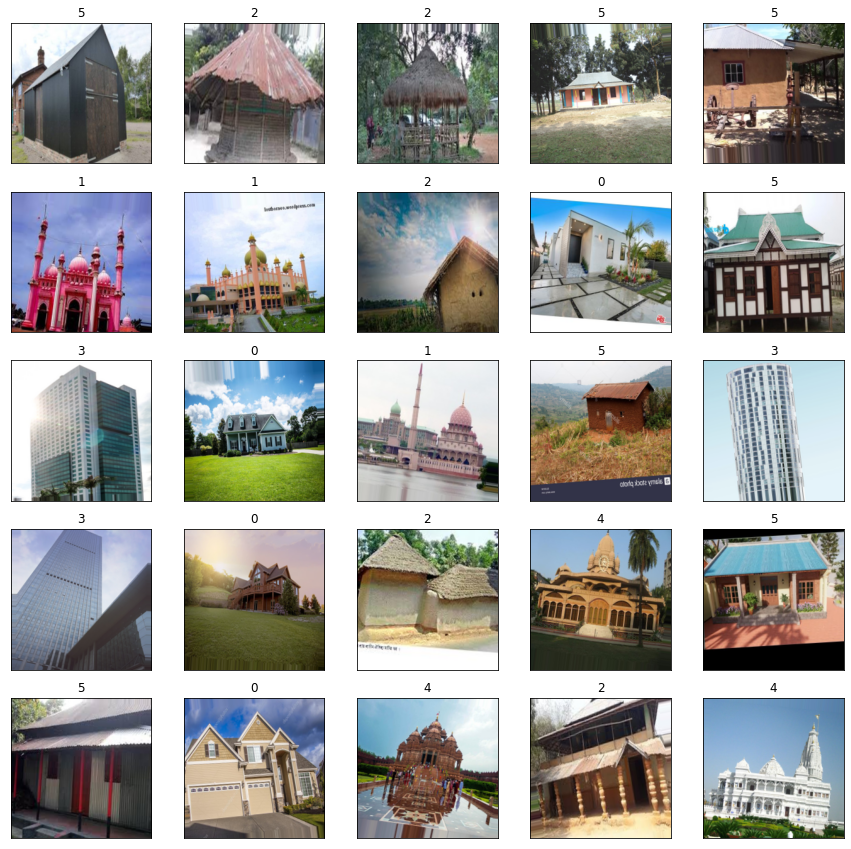

In [14]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

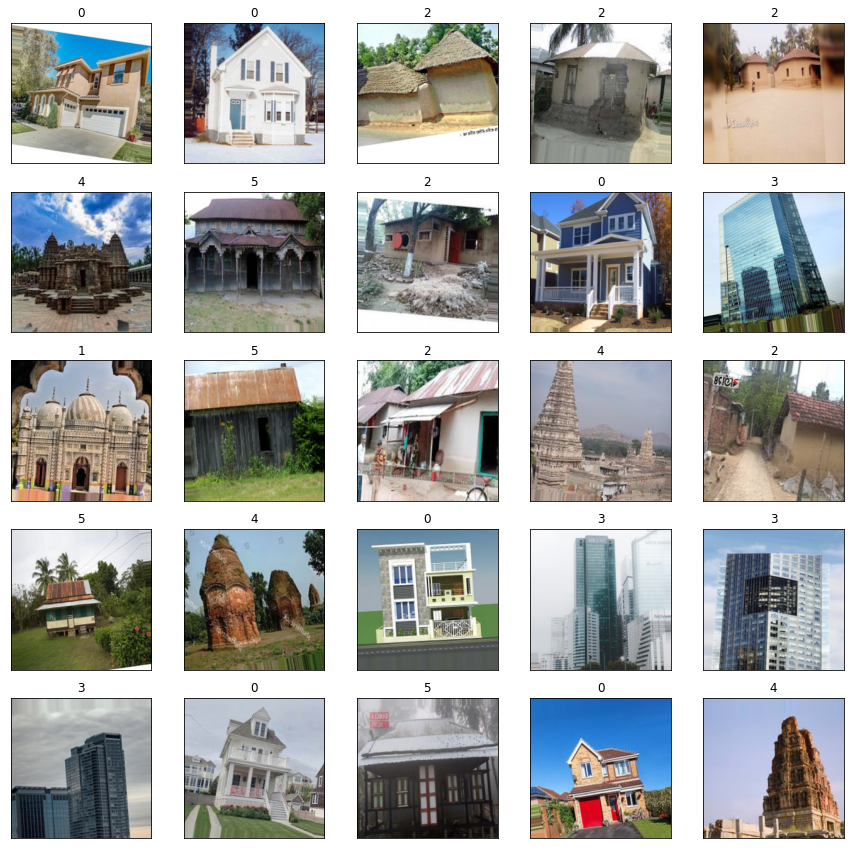

In [15]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Define Convolutional Neural Network Architecture

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow as tf

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(total_class,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

/content/drive/MyDrive/CSE 4000 All Documents and Research Paper (NEW)/dataset_building/Model Save TF/CNN1646990996.png


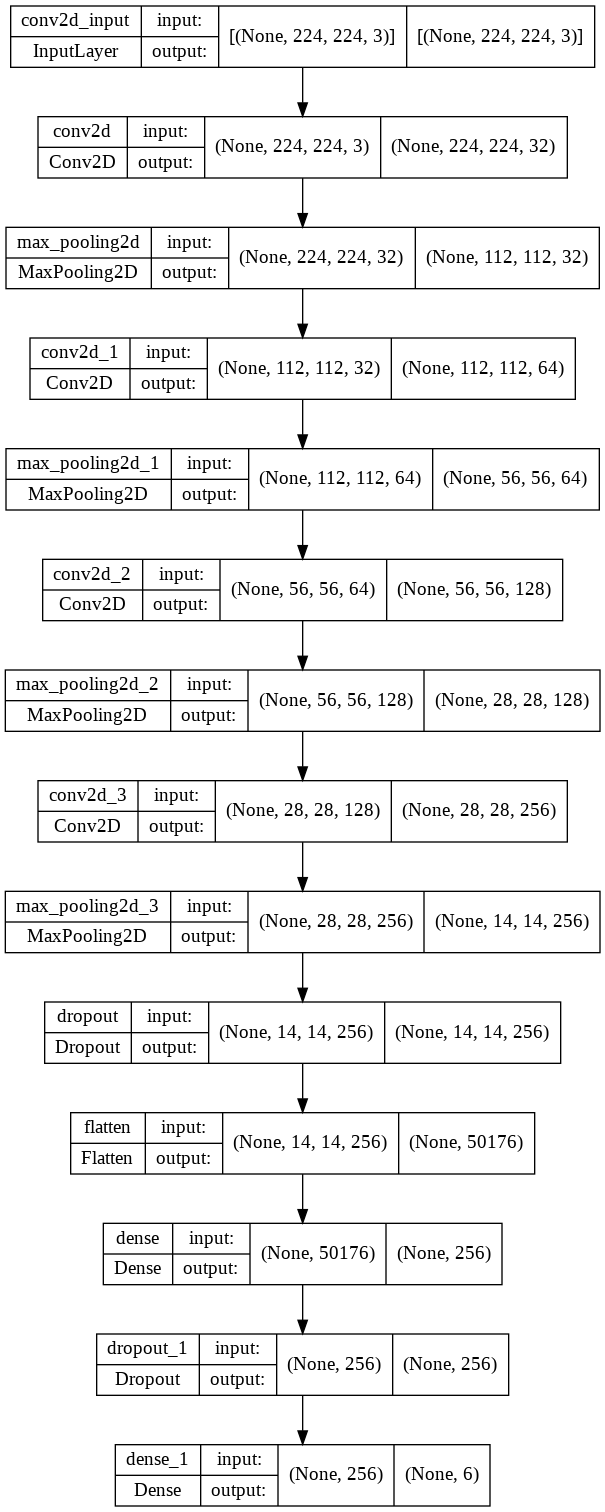

In [ ]:
import time
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 All Documents and Research Paper (NEW)/dataset_building/Model Save TF/CNN'+str(int(t))+'.png'
print(image_name)
keras.utils.plot_model(model,show_shapes=True,to_file=image_name)

## Compile CNN Model

In [ ]:
model.compile(loss='categorical_crossentropy' ,
              optimizer='adam' ,
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.AUC()])

## Trained  CNN Model

In [ ]:
epochs=100
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/CSE 4000 All Documents and Research Paper (NEW)/dataset_building/Model Save TF/building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,callbacks=[checkpointer])

Epoch 1/100
30/30 [==============================] - ETA: 0s - loss: 1.7571 - accuracy: 0.2802 - precision: 0.3520 - recall: 0.0458 - auc: 0.6321
Epoch 1: val_loss improved from inf to 1.51847, saving model to /content/drive/MyDrive/CSE 4000 All Documents and Research Paper (NEW)/dataset_building/Model Save TF/building.model.best.hdf5
30/30 [==============================] - 367s 12s/step - loss: 1.7571 - accuracy: 0.2802 - precision: 0.3520 - recall: 0.0458 - auc: 0.6321 - val_loss: 1.5185 - val_accuracy: 0.4196 - val_precision: 0.7500 - val_recall: 0.0938 - val_auc: 0.7569
Epoch 2/100
30/30 [==============================] - ETA: 0s - loss: 1.3805 - accuracy: 0.4458 - precision: 0.6120 - recall: 0.1594 - auc: 0.8006
Epoch 2: val_loss improved from 1.51847 to 1.21342, saving model to /content/drive/MyDrive/CSE 4000 All Documents and Research Paper (NEW)/dataset_building/Model Save TF/building.model.best.hdf5
30/30 [==============================] - 23s 756ms/step - loss: 1.3805 - accu

## Plot The Graphs

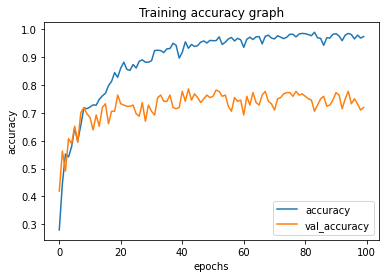

In [ ]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

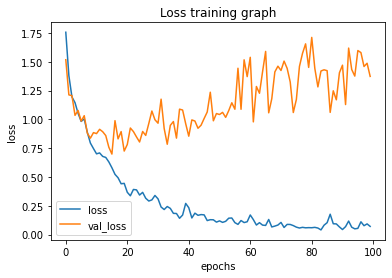

In [ ]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

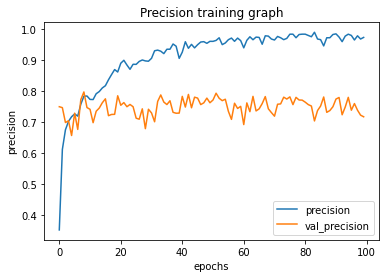

In [ ]:
plt.xlabel('epochs')
plt.ylabel('precision')
plt.title('Precision training graph')
plt.plot(history.history['precision'],label='precision')
plt.plot(history.history['val_precision'],label='val_precision')
plt.legend()
plt.show()

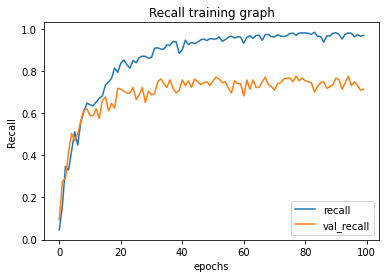

In [ ]:
plt.xlabel('epochs')
plt.ylabel('Recall')
plt.title('Recall training graph')
plt.plot(history.history['recall'],label='recall')
plt.plot(history.history['val_recall'],label='val_recall')
plt.legend()
plt.show()

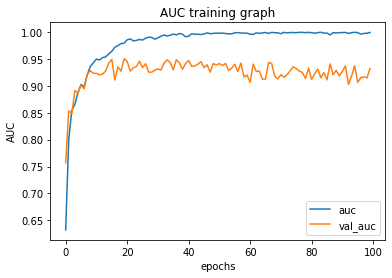

In [ ]:
plt.xlabel('epochs')
plt.ylabel('AUC')
plt.title('AUC training graph')
plt.plot(history.history['auc'],label='auc')
plt.plot(history.history['val_auc'],label='val_auc')
plt.legend()
plt.show()

## Testing the model

In [49]:
test_loss,test_accuracy,test_precision,test_recall,test_auc=model.evaluate(test_dataset)

10/10 [==============================] - 4s 400ms/step - loss: 1.2846 - accuracy: 0.7833 - precision: 0.7872 - recall: 0.7767 - auc: 0.9334


In [50]:
print('Accuracy of the model is : ',test_accuracy*100)
print('Loss of the model is : ',test_loss)
print('Precision of the model is : ',test_precision*100)
print('Recall of the model is : ',test_recall*100)
print('AUC of the model is : ',test_auc*100)

Accuracy of the model is :  78.33333611488342
Loss of the model is :  1.2846444845199585
Precision of the model is :  78.7162184715271
Recall of the model is :  77.66666412353516
AUC of the model is :  93.33789944648743


In [51]:
f1score=(2*test_precision*test_recall)/ (test_precision+test_recall)
print("F1 score: ",f1score*100)

F1 score:  78.18791928696606


## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [ ]:
import time
t = time.time()
export_path_keras = "/content/drive/MyDrive/CSE 4000 All Documents and Research Paper (NEW)/dataset_building/Model Save TF/Model_H5/CNN_model{}_time_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

/content/drive/MyDrive/CSE 4000 All Documents and Research Paper (NEW)/dataset_building/Model Save TF/Model_H5/CNN_model0.7833333611488342_time_1646995763.h5


## Reload the model h5 format

In [9]:
export_path_keras='SavedModel/CNN_model0.7833333611488342_time_1646995763.h5'

In [10]:
from tensorflow.keras.models import load_model

In [11]:
reload_model=load_model(export_path_keras)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [12]:
model=reload_model

## Pandas Dataframe

In [13]:
import pandas as pd

In [ ]:
df=pd.DataFrame(train_dataset)

## Check Random Image


- class 0: brick house
- class 1: mosque
- class 2: mud house
- class 3: skyscraper
- class 4: temple
- class 5: tinshed

In [14]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[9.9990404e-01 4.0778803e-09 3.6188278e-06 6.7124528e-15 1.2279554e-07
  9.2300485e-05]]
0


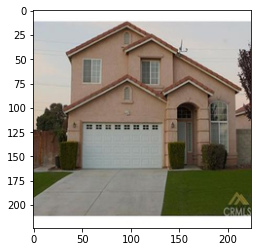

In [15]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/brick_house1.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[7.6032144e-08 9.9999738e-01 5.0733626e-11 6.0273933e-09 2.4718111e-06
  9.9007920e-12]]
1


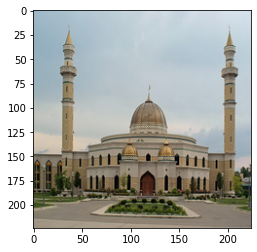

In [16]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/mosque0.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.6074171e-11 9.9999547e-01 2.5806820e-13 2.9621557e-12 4.5611482e-06
  8.3849221e-12]]
1


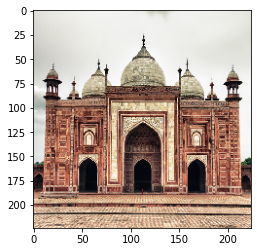

In [17]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/mosque35.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[8.49004778e-08 1.17108144e-07 9.99992251e-01 1.44811400e-15
  7.52117103e-06 9.46924650e-10]]
2


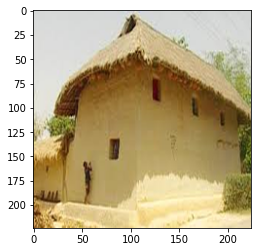

In [27]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/mud72.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.1825827e-17 6.9467828e-14 4.8475806e-15 1.0000000e+00 9.9184723e-12
  4.0811589e-20]]
3


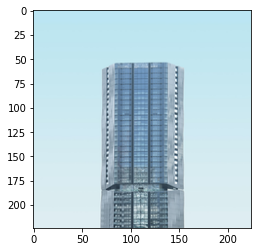

In [28]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/sky79.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.9070622e-13 1.7913810e-07 3.0555679e-16 5.6966636e-20 9.9999976e-01
  7.3500717e-20]]
4


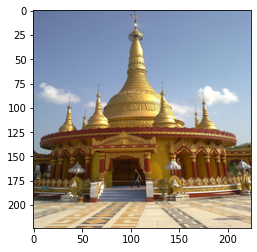

In [29]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/temple33.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.0780654e-08 1.4497414e-08 4.0432180e-08 3.2469734e-14 2.4604551e-08
  9.9999988e-01]]
5


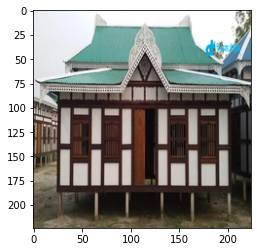

In [30]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/tinshed25.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.8411277e-09 5.9413217e-04 1.0311092e-18 2.2000210e-10 9.9940586e-01
  2.7332258e-15]]
4


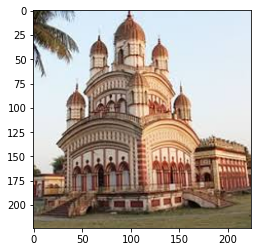

In [31]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/temple72.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[3.0386470e-08 9.9591762e-01 1.6196229e-19 4.0798965e-03 2.4525457e-06
  2.7081013e-17]]
1


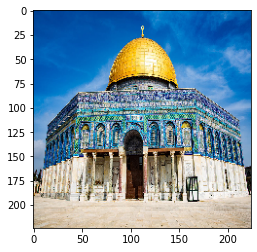

In [42]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/Ismlaic-Architecture12.jpg'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[4.0757146e-12 8.8157337e-12 7.2456710e-22 2.3525326e-21 1.0000000e+00
  4.3376498e-19]]
4


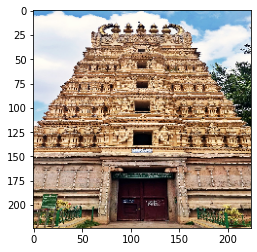

In [44]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/temple.jpg'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

## Classification report 

In [32]:
predicted_result=model.predict(test_dataset)
predicted_result[:5]

array([[7.5109667e-01, 2.1770861e-09, 3.4910150e-07, 3.9312541e-20,
        7.1314134e-02, 1.7758885e-01],
       [9.9946290e-01, 7.3843325e-06, 1.8094201e-12, 2.6539792e-14,
        3.0913654e-08, 5.2967924e-04],
       [9.9749148e-01, 4.7797002e-06, 3.2996099e-11, 2.2185557e-11,
        2.4174984e-10, 2.5037322e-03],
       [7.9526484e-01, 2.7821165e-05, 3.8360902e-08, 7.4423237e-15,
        5.6337851e-10, 2.0470734e-01],
       [9.9999630e-01, 5.9246251e-08, 2.5072660e-16, 6.1224012e-23,
        3.7282425e-06, 3.2624277e-09]], dtype=float32)

In [33]:
predicted_result.shape

(300, 6)

In [34]:
predicted_value=np.argmax(model.predict(test_dataset),axis=-1)
predicted_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 5, 0, 0, 4, 0, 0,
       5, 0, 0, 4, 0, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 5, 0,
       5, 0, 0, 5, 0, 0, 1, 1, 1, 2, 1, 5, 4, 1, 1, 1, 1, 1, 1, 1, 2, 4,
       1, 1, 1, 1, 1, 0, 1, 4, 1, 4, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 4, 1, 1, 1, 1, 3, 4, 5, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 5, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1,
       4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 1, 1, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], d

In [35]:
test_value=test_dataset.classes
test_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [36]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_dataset.classes,predicted_value))

Accuracy score:  0.7833333333333333


In [37]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(test_dataset.classes,predicted_value))

classification report 
               precision    recall  f1-score   support

           0       0.76      0.52      0.62        50
           1       0.74      0.70      0.72        50
           2       0.85      0.90      0.87        50
           3       0.94      0.94      0.94        50
           4       0.77      0.68      0.72        50
           5       0.67      0.96      0.79        50

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



## Another approach to calculate the classification report

In [38]:
predicted_array=model.predict(validation_dataset)
predicted_array

array([[9.9999976e-01, 2.3121960e-07, 1.7823312e-12, 3.0197261e-17,
        3.9002588e-09, 7.2018019e-10],
       [4.5464695e-03, 9.9348503e-01, 8.6910895e-04, 1.4126645e-05,
        1.0852673e-03, 3.6377592e-09],
       [2.0401952e-17, 1.3385096e-15, 9.9980110e-01, 4.4956179e-18,
        1.1822759e-16, 1.9887096e-04],
       ...,
       [8.1458967e-07, 5.9626103e-07, 8.6830807e-01, 3.0966018e-13,
        5.2292148e-10, 1.3169050e-01],
       [7.7891961e-08, 7.0077551e-15, 1.1339521e-12, 5.4462249e-16,
        9.9999976e-01, 9.9647956e-08],
       [4.7868052e-03, 5.7159659e-06, 9.5024115e-01, 4.4303778e-07,
        9.2417749e-06, 4.4956535e-02]], dtype=float32)

In [47]:
from sklearn.metrics import confusion_matrix
cm_matrix=confusion_matrix(test_dataset.classes,predicted_value)
cm_matrix

array([[26,  2,  2,  0,  2, 18],
       [ 1, 35,  2,  3,  8,  1],
       [ 1,  0, 45,  0,  0,  4],
       [ 0,  2,  1, 47,  0,  0],
       [ 6,  8,  1,  0, 34,  1],
       [ 0,  0,  2,  0,  0, 48]], dtype=int64)

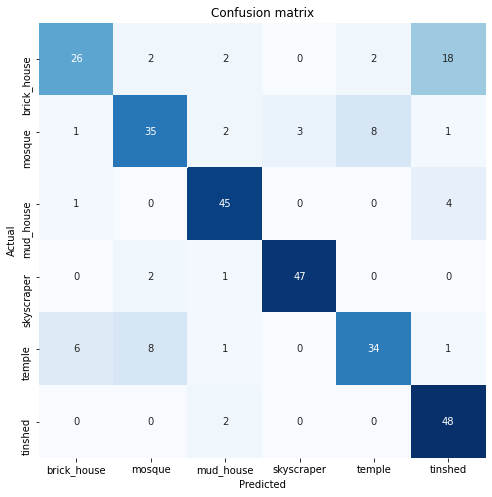

In [48]:
classnames = ['brick_house', 'mosque','mud_house', 'skyscraper', 'temple', 'tinshed']
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm_matrix, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()